#1 Loading Data


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Equipment Database KB2.xlsx to Equipment Database KB2 (3).xlsx


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
import io
import pandas as pd
df = pd.read_excel(io.BytesIO(uploaded['Equipment Database KB2 (3).xlsx']))


In [ ]:
df_sales = pd.read_excel(io.BytesIO(uploaded['Equipment Database KB2 (3).xlsx']), sheet_name='Sales')
df_sales.head()


,ID_Sale,Sale Date,ID_Product,ID_Store,Unit Sold,Price,Total Sale,ID_Salesman,ID_Customer
0,1,2015-12-29,1,1,1,500,500,16,3
1,2,2015-12-29,2,2,1,250,250,2,1
2,3,2015-12-29,3,2,1,980,980,3,10
3,4,2015-12-30,1,2,1,500,500,4,9
4,5,2015-12-30,4,2,1,1500,1500,5,8


In [ ]:
## Conver Sale Date to Datetime
df_sales['Sale Date']=pd.to_datetime(df_sales['Sale Date'])

## Extract the Year and create a new column named year of sale.
df_sales['year of sale'] = df_sales['Sale Date'].dt.year

df_sales['month of sale'] = df_sales['Sale Date'].dt.month
df_sales.head()


,ID_Sale,Sale Date,ID_Product,ID_Store,Unit Sold,Price,Total Sale,ID_Salesman,ID_Customer,year of sale,month of sale
0,1,2015-12-29,1,1,1,500,500,16,3,2015,12
1,2,2015-12-29,2,2,1,250,250,2,1,2015,12
2,3,2015-12-29,3,2,1,980,980,3,10,2015,12
3,4,2015-12-30,1,2,1,500,500,4,9,2015,12
4,5,2015-12-30,4,2,1,1500,1500,5,8,2015,12


In [ ]:
df_sales.set_index('Sale Date',inplace=True)


In [ ]:
df_sales.head(10)


,ID_Sale,ID_Product,ID_Store,Unit Sold,Price,Total Sale,ID_Salesman,ID_Customer,year of sale,month of sale
Sale Date,,,,,,,,,,
2015-12-29,1,1,1,1,500,500,16,3,2015,12
2015-12-29,2,2,2,1,250,250,2,1,2015,12
2015-12-29,3,3,2,1,980,980,3,10,2015,12
2015-12-30,4,1,2,1,500,500,4,9,2015,12
2015-12-30,5,4,2,1,1500,1500,5,8,2015,12
2015-12-31,6,5,2,1,1500,1500,6,3,2015,12
2015-12-31,7,1,2,1,500,500,7,9,2015,12
2015-12-31,8,3,2,1,980,980,8,6,2015,12
2016-01-01,9,6,1,1,990,990,16,11,2016,1


In [ ]:
summary_statistics=df_sales[['Unit Sold','Price','Total Sale']].describe()
summary_statistics.head()


,Unit Sold,Price,Total Sale
count,3337.000000,3337.000000,3337.000000
mean,1.054240,1014.390171,1081.516332
std,0.366943,478.705283,729.909682
min,1.000000,120.000000,120.000000
25%,1.000000,500.000000,500.000000


# 2. Analyze the distribution of sales over time (Monthly & yearly).


In [ ]:
df_sales['Month']=df_sales.index.month  # Extrac the Month of Sale
monthly_sales=df_sales.groupby('Month')['Total Sale'].sum()
yearly_sales=df_sales.groupby('year of sale')['Total Sale'].sum()



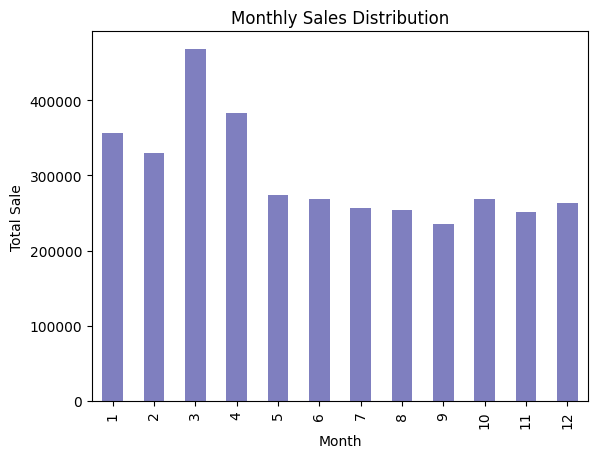

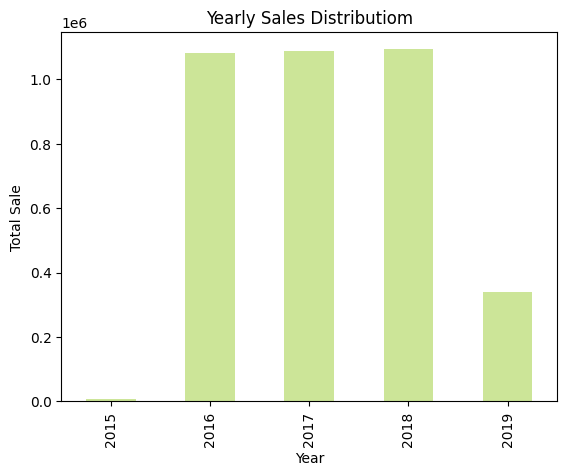

In [ ]:
# Monthly sales distribution plot

monthly_sales.plot(kind='bar', color='navy', alpha= 0.5)
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Sale')
plt.show()

# Yearly Sale Distribution plot

yearly_sales.plot(kind='bar', color = 'yellowgreen',  alpha= 0.5)
plt.title('Yearly Sales Distributiom')
plt.xlabel('Year')
plt.ylabel('Total Sale')
plt.ylabel.rotation = 45
plt.show()

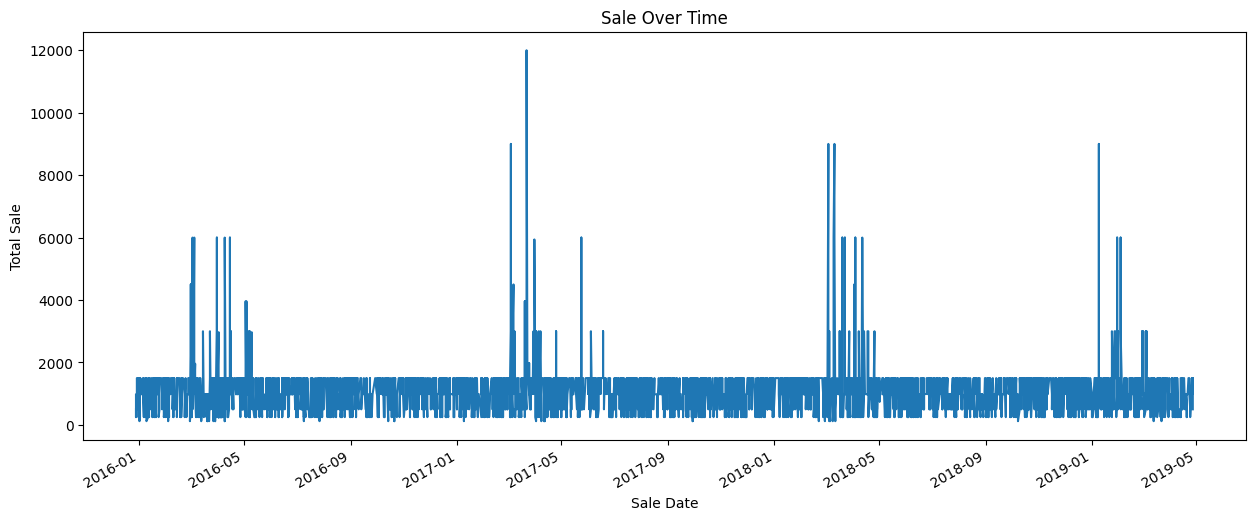

In [ ]:
# Plotting the total sales over time to visually inspect the trends and patterns.
df_sales['Total Sale'].plot(figsize=(15,6))
plt.title('Sale Over Time')
plt.xlabel('Sale Date')
plt.ylabel('Total Sale')
plt.show()

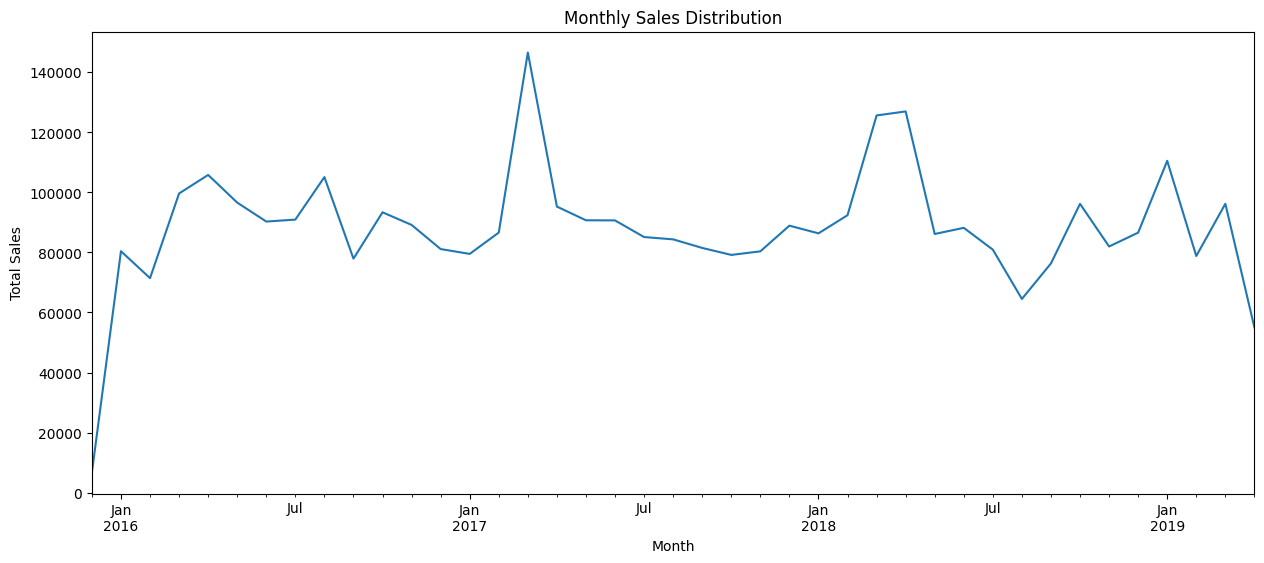

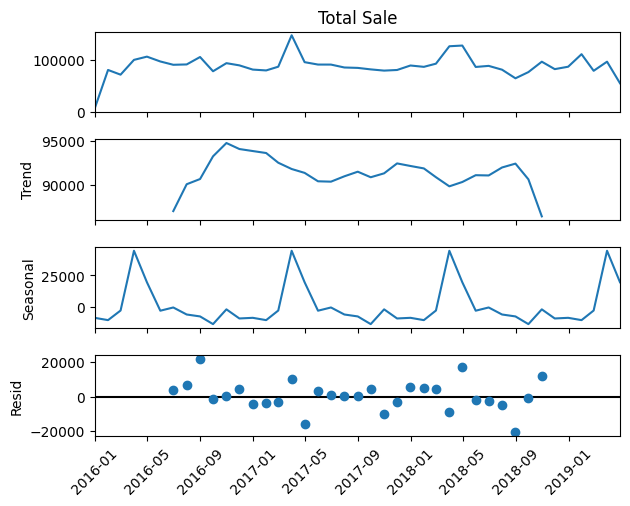

In [ ]:

# Using Seasonal Decomposition to separate the time series into trend, seasonal, and residual components
monthly_sales_data = df_sales['Total Sale'].resample('M').sum()

# Now you can plot the monthly sales data
monthly_sales_data.plot(figsize=(15, 6))
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

decomposition1 = seasonal_decompose(monthly_sales_data, model='additive')
decomposition1.plot()
plt.xticks(rotation=45)
plt.show()

# 3. Sales Performance Analysis.

## (KPIs) SALES ANALYSIS

1.	Total Sales Revenue & Avg. per Transaction.

In [ ]:
total_sales_revenue2=df_sales['Total Sale'].sum()
total_transaction=df_sales['ID_Sale'].nunique()
average_transaction_value=  total_sales_revenue2 / total_transaction

print(f"The total sales revenue from Dec.2015 to Apr. 2019  is: ${total_sales_revenue2:,.2f}")
print(f"Total Number of Transaction: is: {total_transaction}")
print(f"Average per Transaction is: {average_transaction_value :,.2f}")

The total sales revenue from Dec.2015 to Apr. 2019  is: $3,609,020.00
Total Number of Transaction: is: 3337
Average per Transaction is: 1,081.52


2.	Sales Growth Rate.

In [ ]:
sales_by_year=df_sales.groupby('year of sale')['Total Sale'].sum()
sales_growth_rate_yearly=sales_by_year.pct_change()*100

print('Sales Growth rate by year',sales_growth_rate_yearly)

Sales Growth rate by year year of sale
2015             NaN
2016    16017.585693
2017        0.645406
2018        0.315121
2019      -68.820405
Name: Total Sale, dtype: float64


## 2.1 Products.

In [ ]:
product_sales_volumn=df_sales.groupby('ID_Product')['Unit Sold'].sum()
product_sales_volumn_sorted=product_sales_volumn.sort_values(ascending=False)
product_sales_volumn_sorted

ID_Product
4    1023
1     552
5     500
3     476
2     466
6     466
7      35
Name: Unit Sold, dtype: int64

In [ ]:
# Top Performing Products
top_performing_products= product_sales_volumn.nlargest(4)
underperforming_products= product_sales_volumn.nsmallest(3)

print(top_performing_products)
print(underperforming_products)

ID_Product
4    1023
1     552
5     500
3     476
Name: Unit Sold, dtype: int64
ID_Product
7     35
2    466
6    466
Name: Unit Sold, dtype: int64


In [ ]:
# Getting the revenue generated by product
product_revenue_generated= df_sales.groupby('ID_Product')['Total Sale'].sum()
print('Total revenue by product:',product_revenue_generated)

product_revenue_generated_sorted=product_revenue_generated.sort_values(ascending= False)
print(product_revenue_generated_sorted)

Total revenue by product: ID_Product
1     276000
2     116500
3     466480
4    1534500
5     750000
6     461340
7       4200
Name: Total Sale, dtype: int64
ID_Product
4    1534500
5     750000
3     466480
6     461340
1     276000
2     116500
7       4200
Name: Total Sale, dtype: int64


In [ ]:
#Poduct average price.

product_avg_price=product_revenue_generated/product_sales_volumn
product_avg_price

ID_Product
1     500.0
2     250.0
3     980.0
4    1500.0
5    1500.0
6     990.0
7     120.0
dtype: float64

In [ ]:
Product_Total_Sale=df_sales.groupby(['year of sale','ID_Product'])['Unit Sold'].sum().reset_index()
print(Product_Total_Sale)

    year of sale  ID_Product  Unit Sold
0           2015           1          3
1           2015           2          1
2           2015           3          2
3           2015           4          1
4           2015           5          1
5           2016           1        154
6           2016           2        143
7           2016           3        143
8           2016           4        283
9           2016           5        157
10          2016           6        168
11          2016           7         19
12          2017           1        146
13          2017           2        139
14          2017           3        151
15          2017           4        286
16          2017           5        163
17          2017           6        160
18          2017           7          7
19          2018           1        170
20          2018           2        134
21          2018           3        136
22          2018           4        334
23          2018           5        145


In [ ]:
pts=df_sales.groupby(['year of sale','month of sale'])['Total Sale'].sum()
print(pts)

year of sale  month of sale
2015          12                 6710
2016          1                 80390
              2                 71420
              3                 99610
              4                105780
              5                 96570
              6                 90260
              7                 90910
              8                105060
              9                 77910
              10                93340
              11                89140
              12                81100
2017          1                 79490
              2                 86600
              3                146530
              4                 95240
              5                 90680
              6                 90640
              7                 85100
              8                 84330
              9                 81480
              10                79150
              11                80340
              12                88890
2018          1       

## 2.2 Store Analysis.


In [ ]:
stores_sales_volume=df_sales.groupby('ID_Store')['Unit Sold'].sum()
stores_sales_volume_sorted=stores_sales_volume.sort_values(ascending=False)

store_revenue_generated=df_sales.groupby('ID_Store')['Total Sale'].sum()
store_revenue_generated_sorted=store_revenue_generated.sort_values(ascending=False)


print(stores_sales_volume_sorted)
print(store_revenue_generated_sorted)


ID_Store
1    953
2    892
4    892
3    781
Name: Unit Sold, dtype: int64
ID_Store
1    967540
2    919380
4    914970
3    807130
Name: Total Sale, dtype: int64


## 2.3 Customer Analysis

In [ ]:
customer_sales_volume=df_sales.groupby('ID_Customer')['Unit Sold'].sum()
customer_sales_volume_sorted=customer_sales_volume.sort_values(ascending= False)

customer_sales_revenue= df_sales.groupby('ID_Customer')['Total Sale'].sum()
customer_sales_revenue_sorted=customer_sales_revenue.sort_values(ascending= False)

print(customer_sales_volume)
print(customer_sales_volume_sorted)
print(customer_sales_revenue)


ID_Customer
1      325
2      168
3      352
4      352
5      149
6      170
7      182
8      355
9      168
10     168
11    1083
12      46
Name: Unit Sold, dtype: int64
ID_Customer
11    1083
8      355
3      352
4      352
1      325
7      182
6      170
2      168
9      168
10     168
5      149
12      46
Name: Unit Sold, dtype: int64
ID_Customer
1      326300
2      170440
3      359970
4      347120
5      147550
6      177210
7      184960
8      373800
9      171990
10     182560
11    1116970
12      50150
Name: Total Sale, dtype: int64


## 2.4 Salesmen Analysis

In [ ]:
df_sales_filtered= df_sales[df_sales['ID_Salesman']!=16]
salesmen_sales_performance=df_sales_filtered.groupby('ID_Salesman')['Total Sale'].sum()

salesmen_sales_performance_sorted=salesmen_sales_performance.sort_values(ascending= False)
salesmen_sales_performance_sorted


ID_Salesman
2     131280
8     127660
12    126350
11    124200
6     118920
10    118140
13    113110
3     112990
1     112870
14    112100
9     110710
5     109860
4     109100
15    102520
7      96700
Name: Total Sale, dtype: int64

# 4. Visualizing Sales Performance Analysis.

2.1 Products.

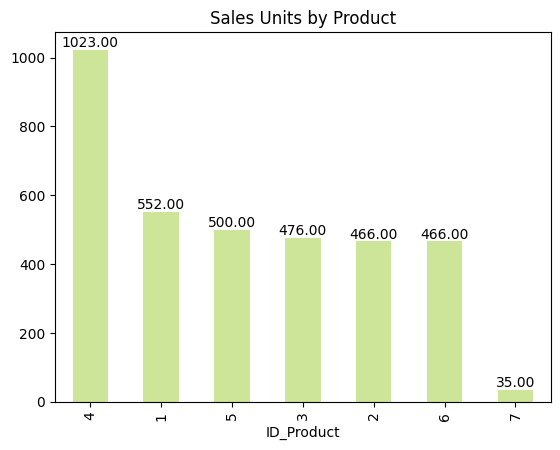

In [ ]:
# Plotting Sales by Product.
product_sales_volumn_sorted.plot(kind='bar',title='Sales Units by Product',color='yellowgreen', alpha= 0.5)

for index, value in enumerate(product_sales_volumn_sorted):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

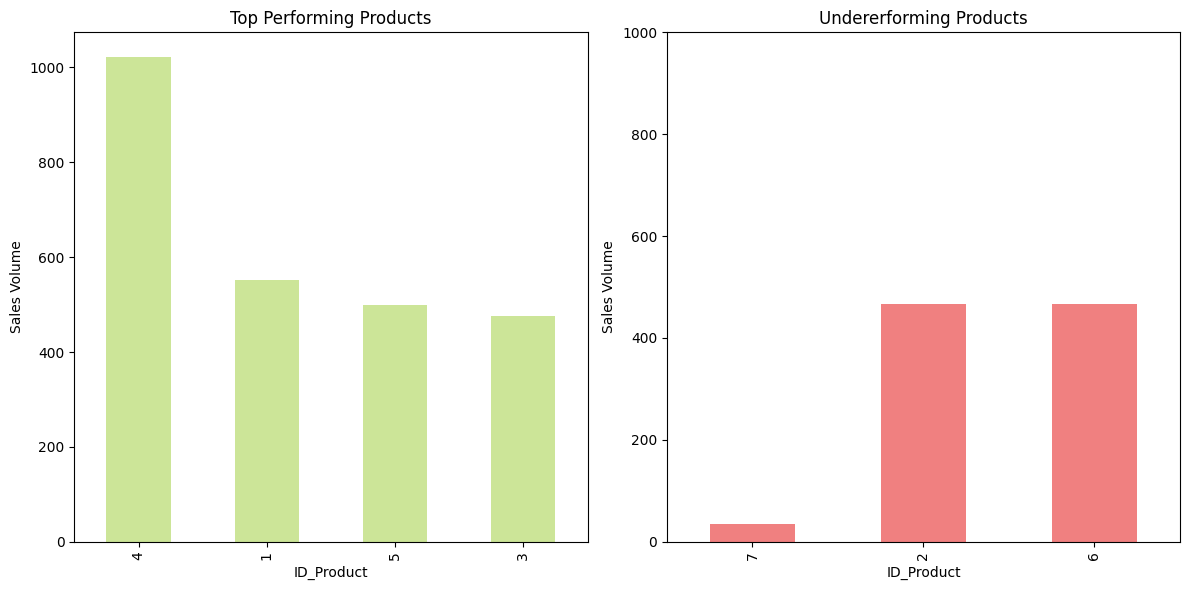

In [ ]:
#Plotting top Performing Products


fig, axes = plt.subplots(nrows= 1 , ncols=2, figsize=(12,6))

#Top Performing Products
top_performing_products.plot(kind='bar',ax= axes[0], color='yellowgreen', alpha= 0.5)
axes[0].set_title('Top Performing Products')
axes[0].set_ylabel('Sales Volume')

#Underperforming Products
underperforming_products.plot(kind='bar',ax= axes[1] ,color='lightcoral')
axes[1].set_title('Undererforming Products')
axes[1].set_ylabel('Sales Volume')
axes[1].set_ylim(0, 1000)

plt.tight_layout()
plt.show()



In [ ]:
# Creating a pivot table to show Products units sold by Year.
pivot_table=Product_Total_Sale.pivot(index='ID_Product', columns='year of sale', values='Unit Sold')
pivot_table

year of sale,2015,2016,2017,2018,2019
ID_Product,,,,,
1,3.0,154.0,146.0,170.0,79.0
2,1.0,143.0,139.0,134.0,49.0
3,2.0,143.0,151.0,136.0,44.0
4,1.0,283.0,286.0,334.0,119.0
5,1.0,157.0,163.0,145.0,34.0
6,NaN,168.0,160.0,122.0,16.0
7,NaN,19.0,7.0,7.0,2.0


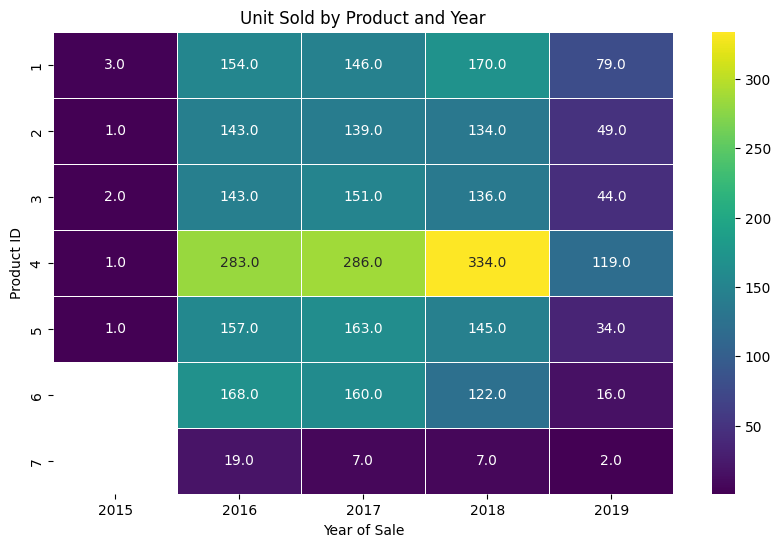

In [ ]:
#Heatmap to show the unit sold by product and by year.
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='.1f', linewidths=.5)
plt.title('Unit Sold by Product and Year')
plt.xlabel('Year of Sale')
plt.ylabel('Product ID')
plt.show()

Text(0.5, 0, 'From Dec. 2015 To Apr.2019')

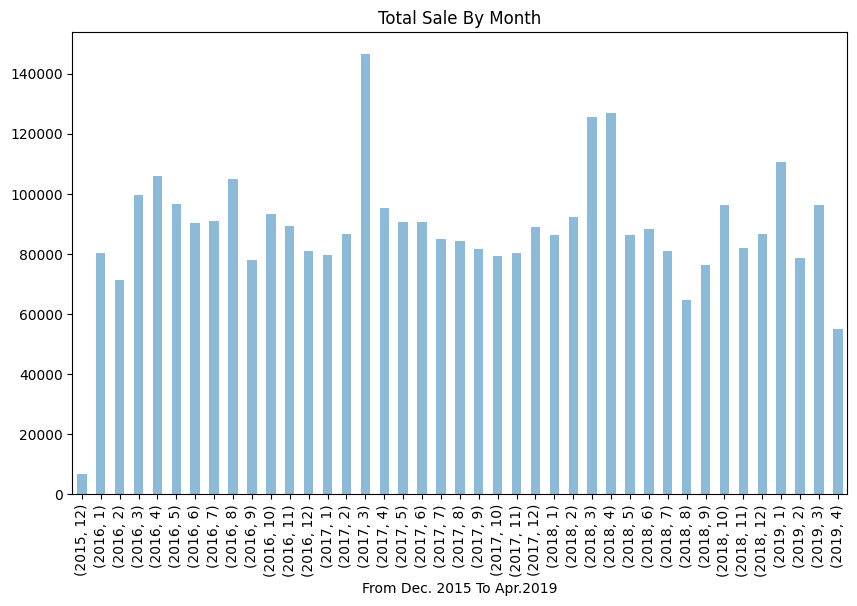

In [ ]:
#Product total sale

pts.plot(kind='bar', title='Total Sale By Month', alpha= 0.5,figsize=(10,6))
plt.xlabel('From Dec. 2015 To Apr.2019')

2.2 Store Sales.

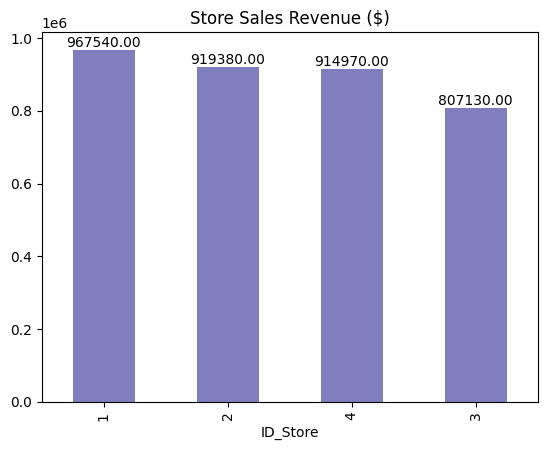

In [ ]:
# Plotting the store saless volume.
store_revenue_generated_sorted.plot(kind='bar',title='Store Sales Revenue ($)', color='navy', alpha= 0.5)

for index, value in enumerate(store_revenue_generated_sorted):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')


plt.show()



2.3 Customer.

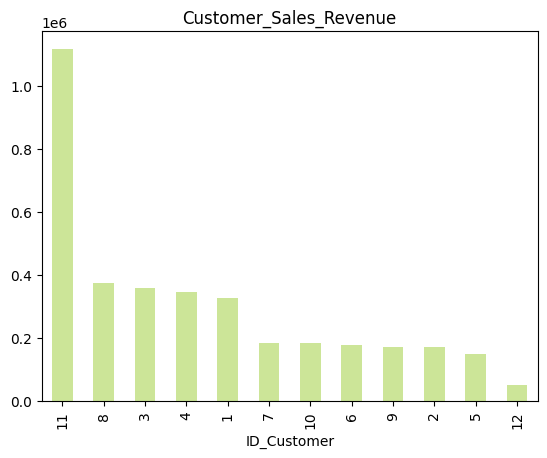

In [ ]:
# Plotting customer_sales_revenue.

customer_sales_revenue_sorted.plot(kind='bar',title='Customer_Sales_Revenue',color='yellowgreen', alpha = 0.5)
plt.show()

2.4 Salesman Performance.

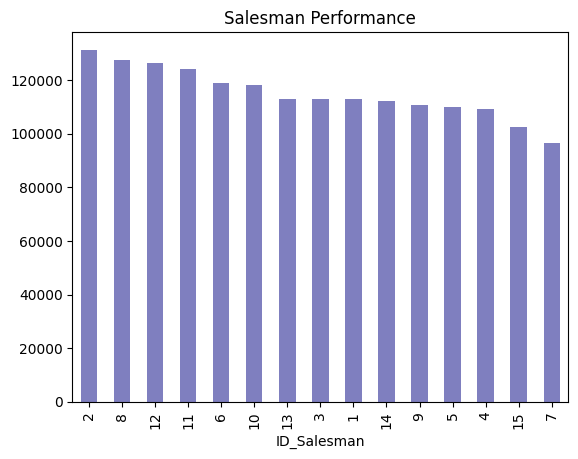

In [ ]:
salesmen_sales_performance_sorted.plot(kind='bar', title='Salesman Performance',color= 'navy', alpha = 0.5)

plt.show()


#5. Forecasting Future Sales.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

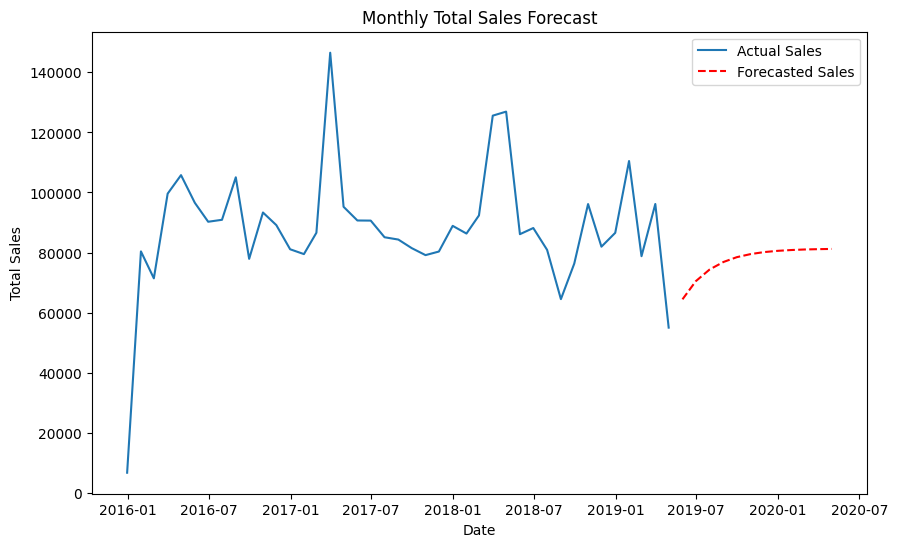

In [ ]:
monthly_sales = df_sales.resample('M').sum()

# Fit an ARIMA model
model = ARIMA(monthly_sales['Total Sale'], order=(1,1,1))  # Example order,
model_fit = model.fit()

# Forecast future sales
future_periods = 12  # Number of future periods to forecast
forecast = model_fit.forecast(steps=future_periods)

# Generate dates for the forecasted periods
last_date = monthly_sales.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_periods+1, freq='M')[1:]

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['Total Sale'], label='Actual Sales')
plt.plot(future_dates, forecast, label='Forecasted Sales', linestyle='--', color='red')
plt.title('Monthly Total Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()